# 1. chapter : First GeoDataFrame

## 1-1. 데이터 불러오기

In [1]:
import geopandas as gpd
import geodatasets

C:\Users\gkdis\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# 파일 불러오기
full_data = gpd.read_file("../../01_data/DEC_lands/DEC_lands/DEC_lands.shp")

full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


In [3]:
# 확인해보고 싶은 데이터만 복사해서 가져오기
data = full_data.loc[:, ['CLASS', 'COUNTY', 'geometry']].copy()

# 몇가지의 랜드 타입이 존재하는지 확인하기
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [4]:
# wild forest 하고 wilderness 타입의 랜드만 불러오기
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


## 1-2. 맵 불러오기

<Axes: >

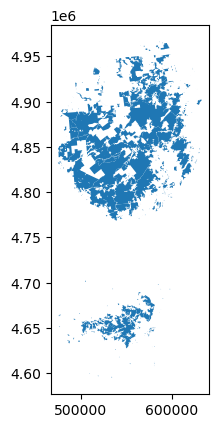

In [5]:
wild_lands.plot()

In [6]:
# 지오메트리 컬럼의 첫 5개 행만 확인해보기
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.55 46...
3    POLYGON ((541716.775 4675243.268, 541217.58 46...
4    POLYGON ((583896.043 4909643.187, 583891.2 490...
Name: geometry, dtype: geometry

In [7]:
# 뉴욕시에 존재하는 캠프사이트를 확인하기에 존재하는 캠프사이트를 확인하기
POI_data = gpd.read_file("../../01_data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET == 'PRIMITIVE CAMPSITE'].copy()

# 뉴욕시의 데코로드 불러오기 라인스트링 타입으로
roads_trails = gpd.read_file("../../01_data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET == 'FOOT TRAIL'].copy()

# 뉴욕시 시군구 경계 데이터 불러오기 폴리곤
counties = gpd.read_file("../../01_data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

<Axes: >

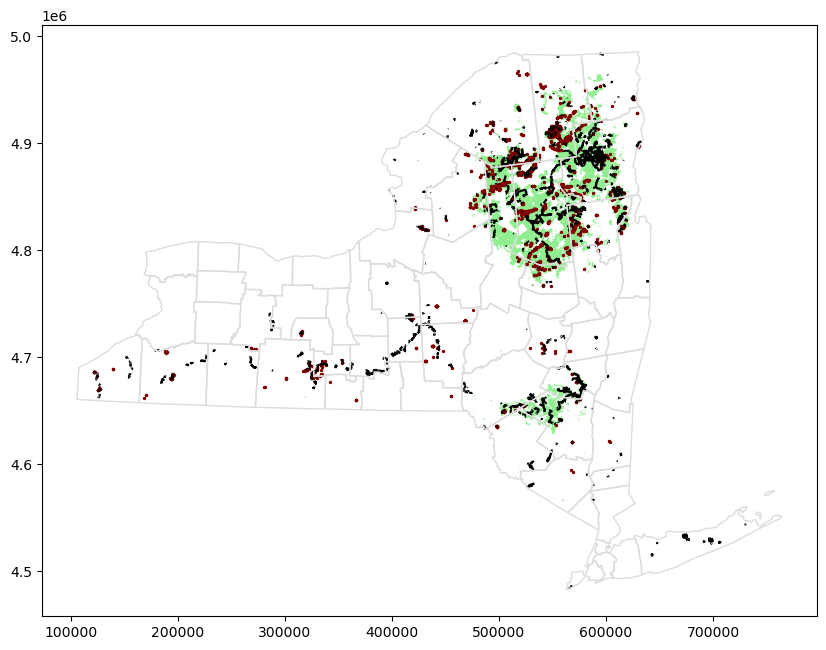

In [8]:
# 전체 맵 그리기
ax = counties.plot(figsize=(10, 10), color='none', edgecolor='gainsboro', zorder=3)

# lands, campsites, foot trails 데이터를 베이스맵에 올리기
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

# 2. exercise

## 2-1. 데이터 불러오기

In [9]:
loans_filepath = "../../01_data/kiva_loans/kiva_loans/kiva_loans.shp"

# 데이터 불러오기
world_loans = gpd.read_file(loans_filepath)

world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.0287)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.0287)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


## 2-2. 데이터 시각화

In [10]:
world_filepath = "../../01_data/110m_cultural/ne_110m_admin_0_countries.shp"
world = gpd.read_file(world_filepath)
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


<Axes: >

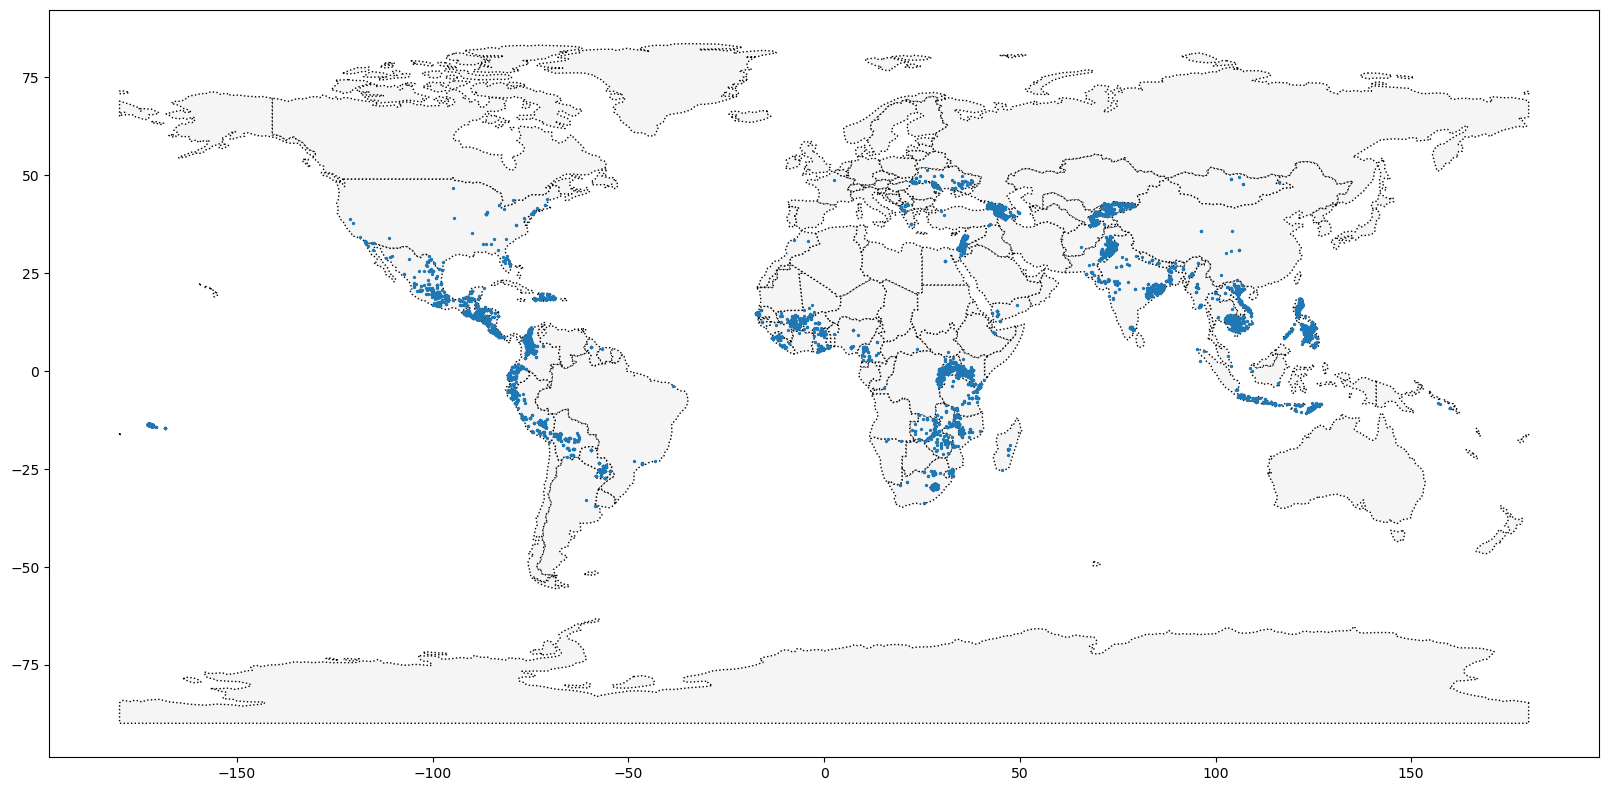

In [11]:
# 시각화
ax = world.plot(figsize=(20, 20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)

In [12]:
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.0287)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.0287)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


## 2-3. 필리핀에서의 대출찾기

In [13]:
# 필리핀에서 찾기
PHL_loans = world_loans.loc[world_loans.country == 'Philippines'].copy()

## 2-4. 필리핀 경계 데이터 불러오기

In [14]:
# 섬 경계 데이터를 포함하고있는 kml 파일 불러오기
import fiona

# KML 파일을 읽기 위한 드라이버 등록
fiona.supported_drivers['KML'] = 'rw'

# KML파일 불러오기
PHL = gpd.read_file("../../01_data/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.4669 4.58718, 119.46653 4...."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.244, 126.45407 8.2..."


<Axes: >

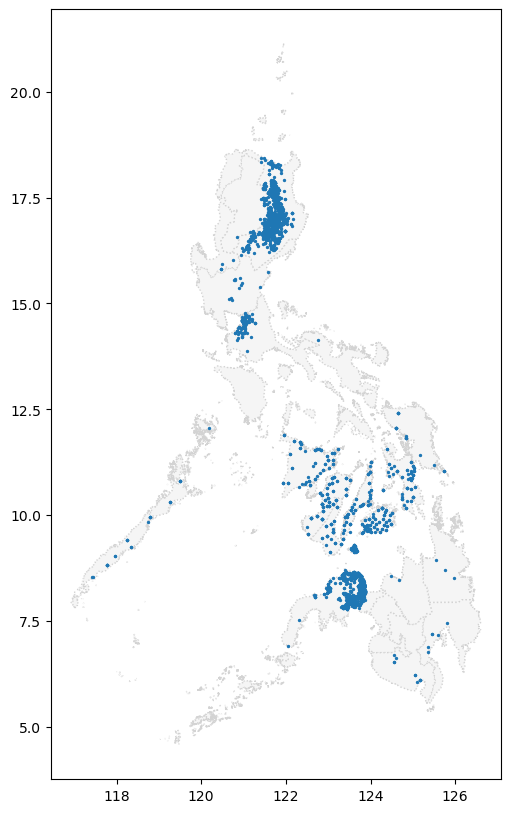

In [18]:
# PHL, PHL_loans 데이터를 시각화
ax = PHL.plot(figsize=(10, 10), color='whitesmoke', linestyle=":", edgecolor='lightgray')
PHL_loans.plot(ax=ax, markersize=2)